In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.random
import tensorflow as tf
import pandas as pd

import sklearn.linear_model
#import sklearn.svm
import sklearn.model_selection
import sklearn.metrics
import sklearn.preprocessing

import datetime
import struct
import time

root_dir = "D:/Jupyter/";
logs_dir = root_dir + "Logs/"
data_dir = root_dir + 'Datasets/'

In [2]:
src = pd.read_csv(data_dir + 'SBRF/train.csv')

(array([   2.,    2.,    8.,    3.,   13.,    1.,    5.,    1.,  164.,
         806.,   64.,   65.,   20.,    7.,   54.,    5.,   18.,   21.,
          40.,  799.,   63.,   64.,   46.,   69.,  117.,   48.,   60.,
          71.,   70.,  461.,  135.,  180.,  170.,  157.,  193.,  242.,
         210.,  276.,  267.,  402.,  273.,  311.,  237.,  384.,  403.,
         367.,  358.,  386.,  361.,  545.,  427.,  431.,  495.,  468.,
         594.,  509.,  481.,  579.,  532.,  576.,  517.,  549.,  602.,
         511.,  625.,  452.,  411.,  437.,  354.,  514.,  333.,  400.,
         311.,  334.,  423.,  299.,  302.,  276.,  195.,  337.,  191.,
         263.,  248.,  217.,  319.,  184.,  200.,  187.,  154.,  257.,
         114.,  154.,  146.,  122.,  174.,  112.,   98.,  119.,   75.,
         181.,   65.,  132.,   96.,  109.,  167.,   64.,   78.,   91.,
          71.,  154.,   40.,   83.,   95.,   73.,  120.,   62.,   71.,
          84.,   62.,  131.,   38.,   54.,   70.,   70.,   95.,   41.,
      

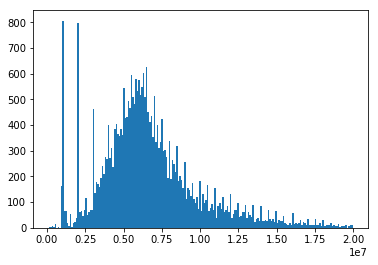

In [43]:
plt.hist(src.price_doc[src.price_doc<20000000], bins=200)

In [49]:
#<0.8mln
src[src.price_doc<800000].describe()


,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,34.000000,34.000000,32.000000,34.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,...,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,4937.529412,57.235294,31.781250,9.029412,10.400000,1.200000,2006.600000,1.600000,6.600000,2.000000,...,13.205882,3.323529,0.705882,7.000000,15.264706,0.176471,3.352941,35.764706,4.588235,467510.382353
std,7520.828602,18.959381,18.567635,5.390706,8.590693,0.447214,5.899152,0.894427,5.639149,1.154701,...,28.335415,10.179363,3.109413,6.844595,15.719721,0.386953,6.848501,36.494963,4.748956,166639.925681
min,97.000000,30.000000,0.000000,1.000000,1.000000,1.000000,2000.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,3.000000,1.000000,100000.000000
25%,1154.500000,37.250000,19.000000,4.000000,1.000000,1.000000,2002.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,4.000000,6.000000,0.000000,0.000000,9.000000,1.000000,343572.250000
50%,2019.500000,57.000000,30.000000,9.000000,16.000000,1.000000,2006.000000,1.000000,10.000000,2.000000,...,1.000000,1.000000,0.000000,4.000000,6.500000,0.000000,1.000000,11.000000,2.000000,500000.000000
75%,3196.250000,76.000000,45.000000,14.000000,17.000000,1.000000,2011.000000,2.000000,10.000000,3.000000,...,14.500000,3.000000,0.000000,9.250000,25.250000,0.000000,2.750000,65.500000,5.750000,550477.750000
max,29064.000000,89.000000,80.000000,17.000000,17.000000,2.000000,2014.000000,3.000000,12.000000,3.000000,...,153.000000,59.000000,18.000000,29.000000,67.000000,1.000000,35.000000,134.000000,18.000000,779396.000000


In [60]:
## >20mln
src[src.price_doc>20000000].describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,541.000000,541.000000,453.000000,538.000000,398.000000,398.000000,343.000000,398.000000,398.000000,341.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.00000,5.410000e+02
mean,17196.756007,119.800370,77.395143,9.890335,14.185930,2.698492,1968.224490,3.195980,9.992462,2.214076,...,129.410351,47.552680,8.916821,47.573013,87.081331,0.957486,33.787431,112.927911,8.90573,3.011095e+07
std,9126.569438,34.181066,35.877812,6.992485,9.894181,1.569401,216.087267,1.081926,8.137821,1.167416,...,125.579228,52.425498,10.031179,48.869864,75.989137,0.714949,36.133870,46.942325,3.74220,1.199530e+07
min,171.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,6.000000,0.00000,2.001671e+07
25%,9164.000000,95.000000,55.000000,5.000000,7.000000,1.000000,1978.000000,3.000000,1.000000,1.000000,...,26.000000,4.000000,1.000000,7.000000,28.000000,0.000000,5.000000,75.000000,6.00000,2.250000e+07
50%,18488.000000,116.000000,69.000000,8.000000,14.000000,2.000000,2004.000000,3.000000,10.000000,2.000000,...,53.000000,14.000000,3.000000,16.000000,39.000000,1.000000,9.000000,97.000000,9.00000,2.556474e+07
75%,25329.000000,142.000000,96.000000,14.000000,22.000000,4.000000,2010.500000,4.000000,14.000000,3.000000,...,265.000000,108.000000,19.000000,83.000000,138.000000,1.000000,73.000000,158.000000,12.00000,3.350000e+07
max,30470.000000,303.000000,197.000000,37.000000,57.000000,6.000000,2017.000000,9.000000,57.000000,4.000000,...,376.000000,147.000000,29.000000,150.000000,249.000000,2.000000,105.000000,215.000000,18.00000,1.111111e+08
